# Analysis of Covid Vaccinations Dataset

A work by @NiccolòDiana, MSc Student of Data Science at Bocconi University in Milan.

### Descriptions of features
<em>country<em> - The countries which are vaccinated\
<em>iso_code<em> - Code which represents the currency of the country\
<em>date<em> - Day of entry\
<em>iso_code<em> - Number of vaccinations made on that day\
<em>totalvaccinated<em> - Total amount of people vaccinated in the country\
<em>people_fully_vaccinated<em> - Number of people in the country who have two vaccinations\
<em>daily_vaccinations<em> - Number of vaccinations on that day\
<em>total_vaccinations_per_hundred<em> - Calculated by (total vaccinated / population) * 100\
<em>people_vaccinated_per_hundred<em> - Calculated by (people vaccinated / population) * 100\
<em>people_fully_vaccinated_per_hundred<em> - Calculated by (people fully vaccinated / population) * 100\
<em>daily_vaccinations_per_million<em> - Calculated by (daily vaccinations / population) * one million\
<em>vaccines<em> - Type of vaccine used\
<em>source_name<em> - Source of informaiton for the vaccines\
<em>source_website<em> - Website for source of informaiton for the vaccines

### Import the necessary dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Import the dataset "country_vaccinations.csv"

In [2]:
df = pd.read_csv('country_vaccinations.csv')
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


Let me analyze the data it contains, in terms of quantity and type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4146 entries, 0 to 4145
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              4146 non-null   object 
 1   iso_code                             3854 non-null   object 
 2   date                                 4146 non-null   object 
 3   total_vaccinations                   2719 non-null   float64
 4   people_vaccinated                    2307 non-null   float64
 5   people_fully_vaccinated              1531 non-null   float64
 6   daily_vaccinations_raw               2296 non-null   float64
 7   daily_vaccinations                   3997 non-null   float64
 8   total_vaccinations_per_hundred       2719 non-null   float64
 9   people_vaccinated_per_hundred        2307 non-null   float64
 10  people_fully_vaccinated_per_hundred  1531 non-null   float64
 11  daily_vaccinations_per_million

For how many countries do we have the data for? And for which ones?

In [15]:
print(f'Number of countries in the dataset : {df["country"].unique().shape[0]}')
print(f'Different countries:\n{df["country"].unique()}')

Number of countries in the dataset : 107
Different countries:
['Albania' 'Algeria' 'Andorra' 'Anguilla' 'Argentina' 'Australia'
 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Bermuda' 'Bolivia' 'Brazil' 'Bulgaria' 'Cambodia' 'Canada'
 'Cayman Islands' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia'
 'Cyprus' 'Czechia' 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'England' 'Estonia' 'Faeroe Islands' 'Falkland Islands'
 'Finland' 'France' 'Germany' 'Gibraltar' 'Greece' 'Greenland' 'Guernsey'
 'Guyana' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Ireland'
 'Isle of Man' 'Israel' 'Italy' 'Japan' 'Jersey' 'Kuwait' 'Latvia'
 'Lebanon' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Macao' 'Maldives'
 'Malta' 'Mauritius' 'Mexico' 'Monaco' 'Morocco' 'Myanmar' 'Nepal'
 'Netherlands' 'New Zealand' 'Northern Cyprus' 'Northern Ireland' 'Norway'
 'Oman' 'Pakistan' 'Panama' 'Peru' 'Poland' 'Portugal' 'Qatar' 'Romania'
 'Russia' 'Saint Helena' 'Saudi

Let me check the timeframe in which the data have been recorded

In [33]:
df['date'] = pd.to_datetime(df['date'])
print(f"The registration of this data began on: {df['date'].min()}")
print(f"The registration of this data ended on: {df['date'].max()}")
print(f"Therefore it spans {(df['date'].max()-df['date'].min()).days} days")

The registration of this data began on: 2020-12-13 00:00:00
The registration of this data ended on: 2021-02-24 00:00:00
Therefore it spans 73 days


Which countries as of the '2021-02-24' have administered more vaccines in absolute terms?

In [59]:
ranked_by_vNum = df[['country','total_vaccinations']].groupby('country').sum().sort_values('total_vaccinations',ascending=False).reset_index()
ranked_by_vNum.head(10)

,country,total_vaccinations
0,United States,1.518341e+09
1,United Kingdom,4.735748e+08
2,England,4.048818e+08
3,Israel,2.442211e+08
4,India,2.107176e+08
5,United Arab Emirates,1.587647e+08
6,China,1.584870e+08
7,Germany,1.357615e+08
8,Brazil,1.276648e+08
9,Turkey,1.218220e+08


Text(0.5, 1.0, 'Countries by number of vaccines administered')

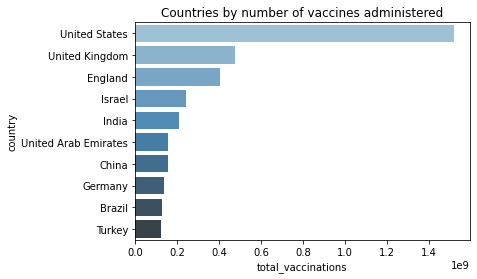

In [49]:
sns.barplot(x="total_vaccinations", y="country", data=ranked_by_vNum[:10], palette='Blues_d').set_title('Countries by number of vaccines administered')

Let us check which country is the best performing, accounting for the number of people living in it, and taking the average "daily_vaccinations_per_million" information.

In [ ]:
ranked_by_mvNum = df[['country','daily_vaccinations_per_million']].groupby('country').mean().sort_values('daily_vaccinations_per_million',ascending=False).reset_index()
ranked_by_mvNum.head(10)

And of course many countries in the list are up there because their population is relatively small when compared to larger countries, which makes for less beaurocratic impediments and faster vaccine administration per million of citizens. Surprisingly, Israel and United Arab Emirates still remain up there.

Let me now consider the daily vaccinations per million, and make a comparison between the top 15 countries with the greatest absolute number of vaccined individuals.

In [65]:
top_10_totV = ranked_by_vNum['country'][:10].values

<AxesSubplot:xlabel='date', ylabel='daily_vaccinations_per_million'>

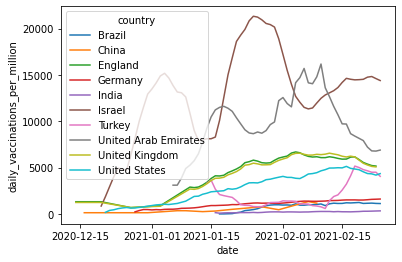

In [66]:
sns.lineplot(data=df[df['country'].isin(top_10_totV)], hue='country', x='date', y='daily_vaccinations_per_million')

We can graphically see that consistently overtime the most efficient countries in administering the vaccine are Israel and the UAE.

In [68]:
import geopandas
#requires the 'descartes' dependency

In [69]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [75]:
world.head()

In [76]:
world_merged = pd.merge(world, df, left_on='iso_a3', right_on='iso_code', how='inner')

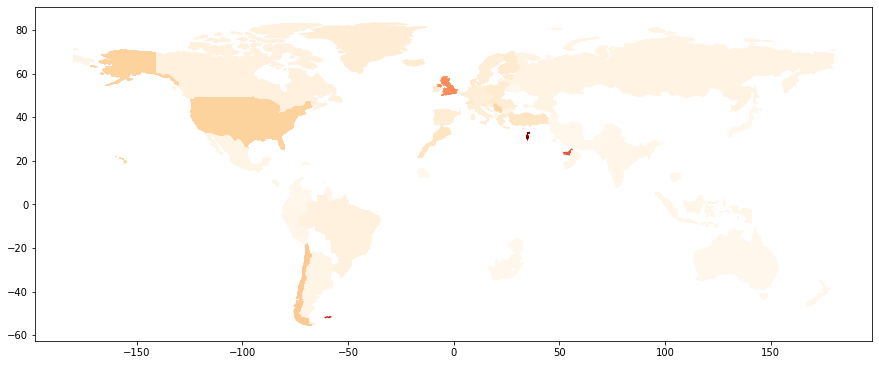

In [90]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize = (15,15))
world_merged.plot(column='people_vaccinated_per_hundred', cmap='OrRd', ax=ax)
plt.show()

As we can see from the picture we see some countries outperforming others when it comes to administering the vaccine, and on the other hand of the spectrum we have other areas, such as Africa and Eastern Asia that are lagging far behind.

Let me now analyze the distributors of the vaccines, to see whether in the market one prevails upon the others, or simply even who the latest players joining the game are.

In [93]:
unique_distributors = list()
for i in df['vaccines'].unique():
    items = i.split(',')
    items_stripped = [i.strip() for i in items]
    for i in items_stripped:
        if i not in unique_distributors:
            unique_distributors.append(i)
unique_distributors

['Pfizer/BioNTech',
 'Sputnik V',
 'Oxford/AstraZeneca',
 'Moderna',
 'Sinopharm/Beijing',
 'Sinovac',
 'Sinopharm/Wuhan',
 'Covaxin',
 'Johnson&Johnson']

In [102]:
df[unique_distributors] = 0
for dist in unique_distributors:
    df.loc[df['vaccines'].str.contains(dist), dist] = 1

Let's check how popular the different vaccines were. Specifically let's count in how many countries each vaccine has been used in the timeframe containing our data.

In [122]:
distrs = df[['country']+unique_distributors].groupby('country').any().reset_index()
most_popular = distrs[unique_distributors].sum(axis=0).sort_values(ascending=False)
most_popular

Pfizer/BioNTech       70
Oxford/AstraZeneca    54
Moderna               28
Sinopharm/Beijing     14
Sputnik V             11
Sinovac                6
Sinopharm/Wuhan        2
Johnson&Johnson        1
Covaxin                1
dtype: int64